In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as ran
from time import time
π=np.pi
r=100
x0,y0=0,0

X,Y = [x0],[y0]
R,Θ = [np.sqrt(x0**2+y0**2)], [np.arctan2(y0,x0)]
x,y = x0,y0
steps=0

t=time()
while x**2+y**2<r**2:
    ξ=2*π*ran.random()
    x+=np.cos(ξ)
    y+=np.sin(ξ)
    X.append(x)
    Y.append(y)
    R.append(np.sqrt(x**2+y**2))
    Θ.append(np.arctan2(y,x))
    steps+=1
t=time()-t

Tempo di esecuzione: 0.2672 s


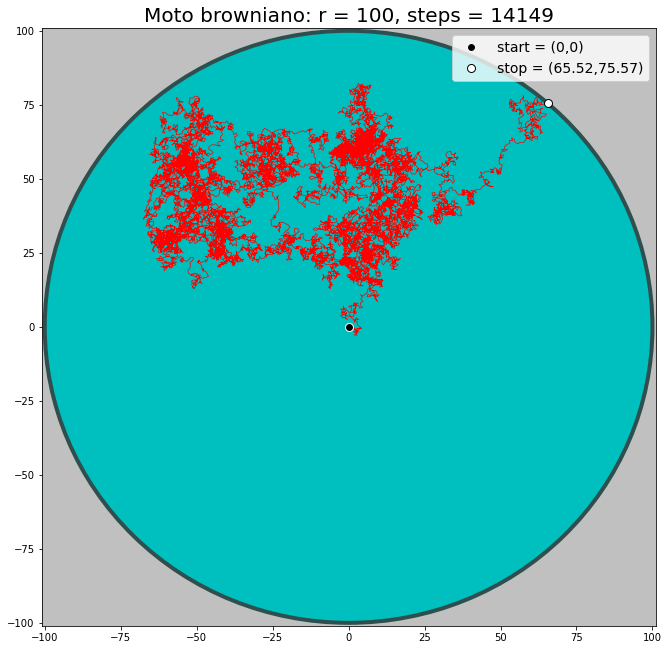

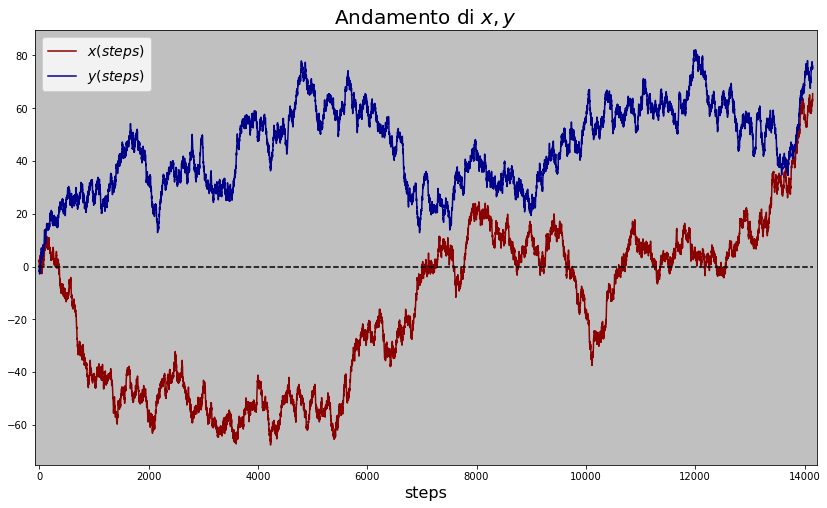

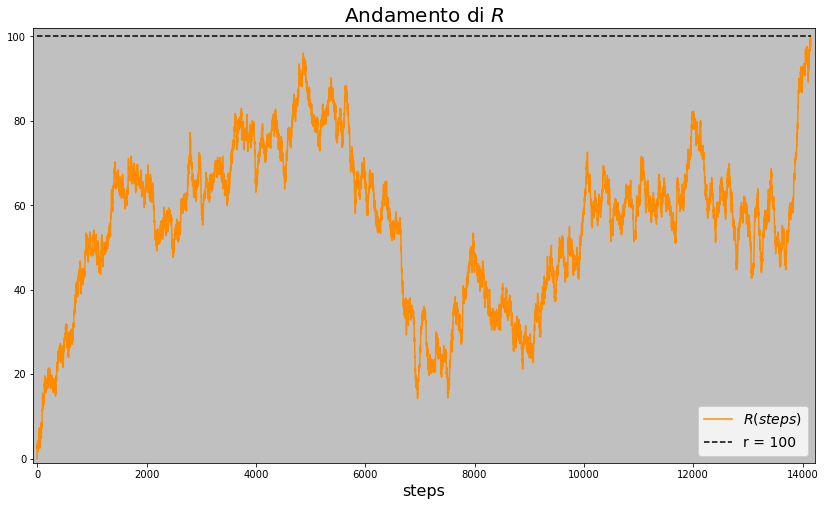

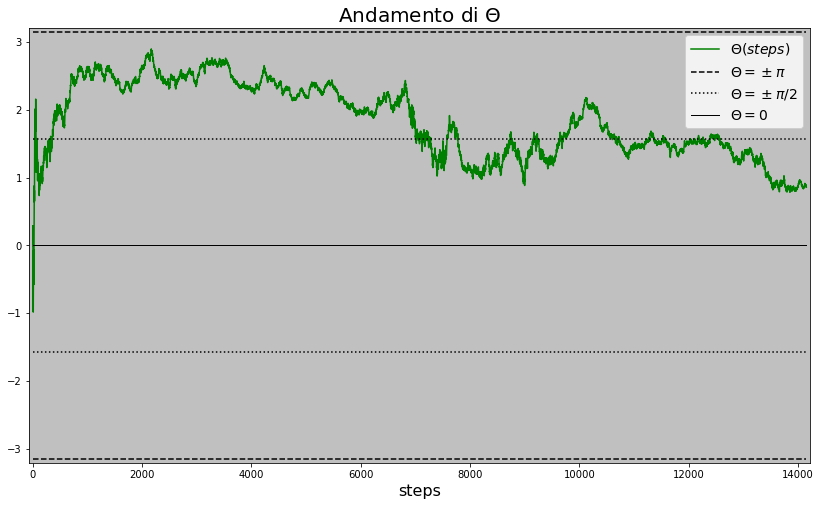

In [4]:
print('Tempo di esecuzione:',round(t,4),'s')

plt.figure(figsize=(11,11))
ax=plt.axes()
ax.set_facecolor('silver')
circle1=plt.Circle((0,0),r,color='c')
circle2=plt.Circle((0,0),r,color='darkslategrey',fill=False,lw=4)
ax.add_patch(circle1)
ax.add_patch(circle2)
plt.title('Moto browniano: r = '+str(r)+', steps = '+str(steps), size=20)

plt.plot(X,Y,'r',lw=0.7)
plt.plot([x0],[y0],'o k',mec='w',label='start = ('+str(x0)+','+str(y0)+')',ms=8)
plt.plot([X[-1]],[Y[-1]],'o w',mec='k',label='stop = ('+str(round(X[-1],2))+','+str(round(Y[-1],2))+')',ms=8)
plt.legend(fontsize=14)
plt.xlim((-r*1.01,r*1.01))
plt.ylim((-r*1.01,r*1.01))
plt.show()


plt.figure(figsize=(14,8))
ax=plt.axes()
ax.set_facecolor('silver')
plt.title('Andamento di $x,y$',size=20)

plt.plot(X,'darkred',lw=1.5,label='$x(steps)$')
plt.plot(Y,'darkblue',lw=1.5,label='$y(steps)$')
plt.plot([0,steps],[0,0],'--k')
plt.xlabel('steps',size=16)
plt.xlim((-0.005*steps,1.005*steps))
plt.legend(fontsize=14)
plt.show()


plt.figure(figsize=(14,8))
ax=plt.axes()
ax.set_facecolor('silver')
plt.title('Andamento di $R$',size=20)

plt.plot(R,'darkorange',lw=1.5,label='$R(steps)$')
plt.plot([0,steps],[r,r],'--k',label='r = '+str(round(r,2)))
plt.xlabel('steps',size=16)
plt.legend(fontsize=14)
plt.xlim((-0.005*steps,1.005*steps))
plt.ylim((-1,r*1.02))
plt.show()


plt.figure(figsize=(14,8))
ax=plt.axes()
ax.set_facecolor('silver')
plt.title('Andamento di $\Theta$',size=20)

plt.plot(Θ,'green',lw=1.5,label='$\Theta (steps)$')
plt.plot([0,steps],[π,π],'--k',label='$\Theta = \pm \pi$')
plt.plot([0,steps],[-π,-π],'--k')
plt.plot([0,steps],[π/2,π/2],':k',label='$\Theta = \pm \pi/2$')
plt.plot([0,steps],[-π/2,-π/2],':k')
plt.plot([0,steps],[0,0],'k',lw=1,label='$\Theta = 0$')
plt.xlabel('steps',size=16)
plt.legend(fontsize=14)
plt.xlim((-0.005*steps,1.005*steps))
plt.ylim((-1.02*π,1.02*π))
plt.show()

In [3]:
Nwalks=100

Sample_s=[]
Sample_x=[]
Sample_y=[]
Sample_θ=[]
Sum_s, Sum2_s = 0,0
Sum_x, Sum2_x = 0,0
Sum_y, Sum2_y = 0,0
Sum_θ, Sum2_θ = 0,0

t1=time()
for i in range(Nwalks):
    x,y,θ = x0,y0,np.arctan2(y0,x0)
    steps=0

    while x**2+y**2<r**2:
        ξ=2*π*ran.random()
        x+=np.cos(ξ)
        y+=np.sin(ξ)
        θ=np.arctan2(y,x)
        steps+=1

    Sample_s.append(steps)
    Sample_x.append(x)
    Sample_y.append(y)
    Sample_θ.append(np.arctan2(y,x))
    
    Sum_s, Sum2_s = Sum_s+steps,Sum2_s+steps**2
    Sum_x, Sum2_x = Sum_x+x, Sum2_x+x**2
    Sum_y, Sum2_y = Sum_y+y, Sum2_y+y**2
    Sum_θ, Sum2_θ = Sum_θ+θ, Sum2_θ+θ**2

μ_s,σ2_s = Sum_s/Nwalks, (Sum2_s-Sum_s**2/Nwalks)/(Nwalks-1)
μ_x,σ2_x = Sum_x/Nwalks, (Sum2_x-Sum_x**2/Nwalks)/(Nwalks-1)
μ_y,σ2_y = Sum_y/Nwalks, (Sum2_y-Sum_y**2/Nwalks)/(Nwalks-1)
μ_θ,σ2_θ = Sum_θ/Nwalks, (Sum2_θ-Sum_θ**2/Nwalks)/(Nwalks-1)

min_s,max_s = min(Sample_s),max(Sample_s)
min_x,max_x = min(Sample_x),max(Sample_x)
min_y,max_y = min(Sample_y),max(Sample_y)
min_θ,max_θ = min(Sample_θ),max(Sample_θ)

t1=time()-t1

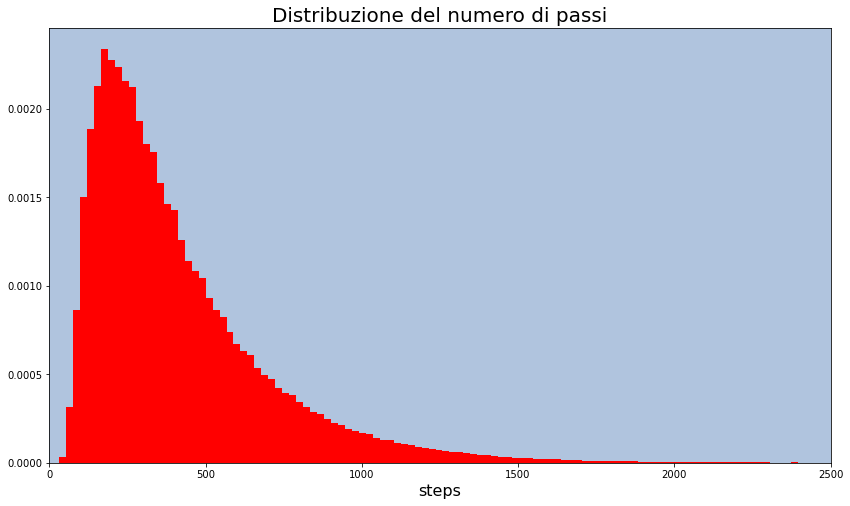

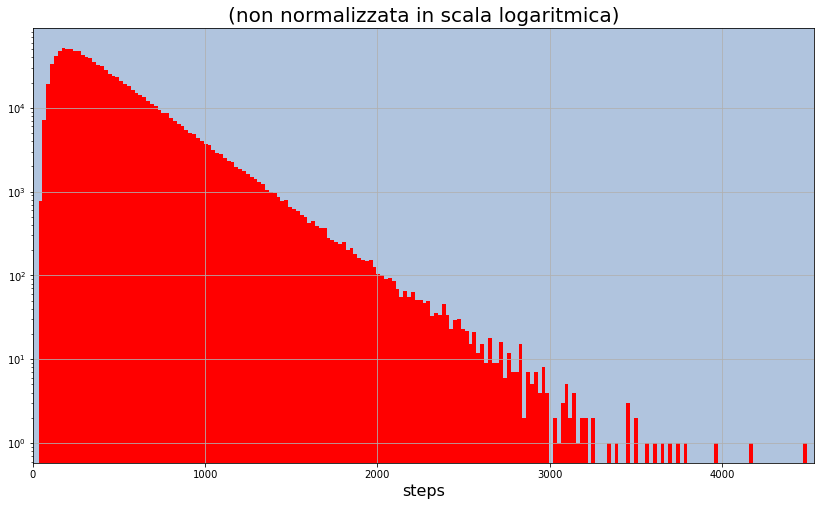

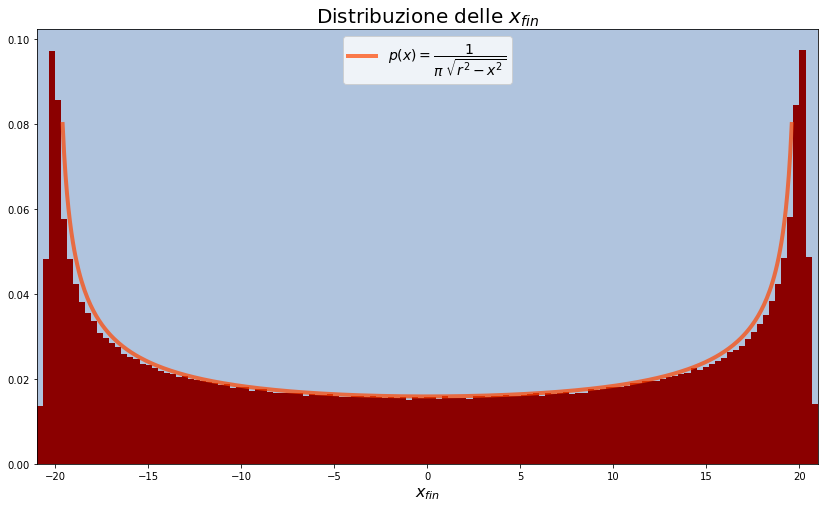

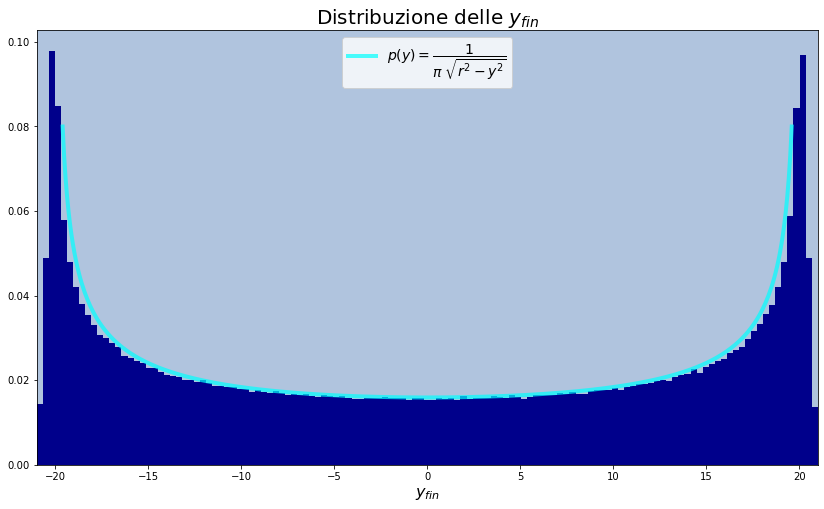

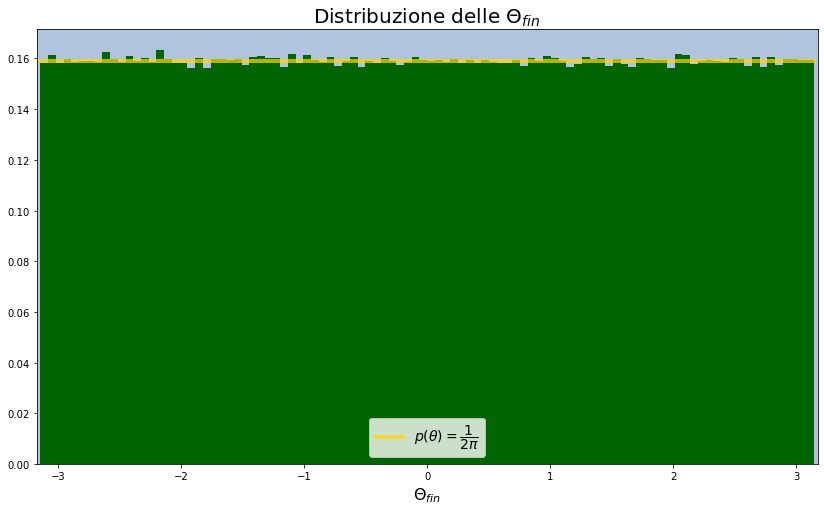

Raggio:              20
Posizione iniziale:  (0, 0)
Numero di cammini:   1000000
Tempo di esecuzione: 4615.203 s = 76 m 55.203 s

Media sui passi:    414.1967
Varianza sui passi: 85694.2872
Minimo:             32
Massimo:            4491 

Media su x:    -0.0081
Varianza su x: 207.0887
Minimo:        -20.99733
Massimo:       20.993928 

Media su y:    -0.014
Varianza su y: 207.1442
Minimo:        -20.992348
Massimo:       20.995317 

Media su θ:    -0.0016
Varianza su θ: 3.2913
Minimo:        -3.141583
Massimo:       3.14159


In [7]:
t2=time()
X=np.linspace(-0.98*r,0.98*r,500)

plt.figure(figsize=(14,8))
ax=plt.axes()
ax.set_facecolor('lightsteelblue')
plt.title('Distribuzione del numero di passi',size=20)
plt.hist(Sample_s,bins=200,density=True,color='r')
plt.xlabel('steps',size=16)
plt.xlim(0, 2500)
plt.show()

plt.figure(figsize=(14,8))
ax=plt.axes()
ax.set_facecolor('lightsteelblue')
plt.title('(non normalizzata in scala logaritmica)',size=20)
plt.hist(Sample_s,bins=200,density=False,log=True,color='r')
plt.xlabel('steps',size=16)
plt.xlim( (0, 1.01*max(Sample_s)) )
plt.grid()
plt.show()

plt.figure(figsize=(14,8))
ax=plt.axes()
ax.set_facecolor('lightsteelblue')
plt.title('Distribuzione delle $x_{fin}$',size=20)
plt.hist(Sample_x,bins=3*(2*int(r)+3),density=True,color='darkred')
plt.plot(X,1/(π*np.sqrt(r**2-X**2)),'orangered',lw=4,alpha=0.7,label=r'$p(x)=\dfrac{1}{\pi\; \sqrt{r^2-x^2}}$')
plt.xlabel('$x_{fin}$',size=16)
plt.xlim((-1.05*r,1.05*r))
plt.legend(fontsize=14,loc='upper center')
plt.show()

plt.figure(figsize=(14,8))
ax=plt.axes()
ax.set_facecolor('lightsteelblue')
plt.title('Distribuzione delle $y_{fin}$',size=20)
plt.hist(Sample_y,bins=3*(2*int(r)+3),density=True,color='darkblue')
plt.plot(X,1/(π*np.sqrt(r**2-X**2)),'cyan',lw=4,alpha=0.7,label=r'$p(y)=\dfrac{1}{\pi\; \sqrt{r^2-y^2}}$')
plt.xlabel('$y_{fin}$',size=16)
plt.xlim((-1.05*r,1.05*r))
plt.legend(fontsize=14,loc='upper center')
plt.show()

plt.figure(figsize=(14,8))
ax=plt.axes()
ax.set_facecolor('lightsteelblue')
plt.title('Distribuzione delle $\Theta_{fin}$',size=20)
plt.hist(Sample_θ,bins=100,density=True,color='darkgreen')
plt.plot([-π,π],[1/(2*π),1/(2*π)],'gold',lw=4,alpha=0.7,label=r'$p(\theta)=\dfrac{1}{2\pi}$')
plt.xlabel('$\Theta_{fin}$',size=16)
plt.xlim((-1.01*π,1.01*π))
plt.legend(fontsize=14,loc='lower center')
plt.show()
t2=time()-t2
T=t1+t2


print('Raggio:             ',round(r,6))
print('Posizione iniziale: ',(round(x0,6), round(y0,6)))
print('Numero di cammini:  ',Nwalks)
print('Tempo di esecuzione:',round(T,3),'s =',int(T//60),'m',round(T%60,3),'s\n')

print('Media sui passi:   ',round(μ_s,4))
print('Varianza sui passi:',round(σ2_s,4))
print('Minimo:            ',min_s)
print('Massimo:           ',max_s,'\n')

print('Media su x:   ',round(μ_x,4))
print('Varianza su x:',round(σ2_x,4))
print('Minimo:       ',round(min_x,6))
print('Massimo:      ',round(max_x,6),'\n')

print('Media su y:   ',round(μ_y,4))
print('Varianza su y:',round(σ2_y,4))
print('Minimo:       ',round(min_y,6))
print('Massimo:      ',round(max_y,6),'\n')

print('Media su θ:   ',round(μ_θ,4))
print('Varianza su θ:',round(σ2_θ,4))
print('Minimo:       ',round(min_θ,6))
print('Massimo:      ',round(max_θ,6))

Il moto browniano prevede che la probabilità delle direzioni di avanzamento sia uniforme, pertanto ci aspettiamo che non ci sia una direzione privilegiata verso la quale giunge la particella (a patto che $(x_0,y_0)=(0,0)$). Quindi $\theta_{fin}$ si distribuisce uniformemente in $[-\pi,\pi]$:

$\displaystyle p_{\theta}(\theta_{fin})\equiv \frac{1}{b-a}=\frac{1}{2\pi} \;\;\; \theta_{fin} \in [-\pi,\pi]$

L'andamento delle distribuzioni di $x_{fin},y_{fin}$ è comprensibile, noto quello di $\theta_{fin}$. Infatti

$\displaystyle \begin{cases}x_{fin}\equiv x_{fin}(\theta_{fin})=r \cos(\theta_{fin}) \\ y_{fin}\equiv y_{fin}(\theta_{fin})=r \sin(\theta_{fin})\end{cases} \;\;$ quindi $x_{fin},y_{fin}$ si distribuiscono come trasformazioni della variabile casuale $\theta_{fin}$.

$\displaystyle p_{y}(y_{fin})=p_{\theta}(\eta(y_{fin})) \; |\eta'(y_{fin})|; \;\;\; \eta(y_{fin})=\sin^{-1}\left( \frac{y_{fin}}{r} \right) \;\;\; y_{fin}\in [-r,r] \\
\displaystyle p_{y}(y_{fin})=\frac{1}{2\pi r}\frac{1}{\sqrt{1-(y_{fin}/r)^2}}=\frac{1}{2\pi} \frac{1}{\sqrt{r^2-y_{fin}^2}}$

In realtà il seno non è invertibile in $\theta_{fin} \in [-\pi,\pi]$, ma solo in $[-\pi/2, \pi/2]$. Tuttavia, per $\theta_{fin} \in [-\pi,-\pi/2]$ e $\theta_{fin} \in [\pi/2,\pi]$ il seno assume simmetricamente gli stessi valori ($-\pi/2$ e $\pi/2$ sono assi di simmetria per la funzione seno). Ciò vuol dire che gli angoli in questi ultimi due intervalli contribuiscono alla distribuzione delle $y$ parimenti agli angoli in $[-\pi/2,\pi/2]$. Ciò vuol dire che $p_{y}(y_{fin})$ va moltiplicata di un fattore $2$:

$\displaystyle p_y(y_{fin})=\frac{1}{\pi \; \sqrt{r^2-y_{fin}^2}} \;\;\; y\in(-r,r) \;\;$; lo stesso ragionamento vale per la distribuzione di $x_{fin}$:

$\displaystyle p_x(x_{fin})=\frac{1}{\pi \; \sqrt{r^2-x_{fin}^2}} \;\;\; x\in(-r,r) \;\;$